# Introdução

No mundo de hoje é extremamente difícil imaginar o cotidiano das pessoas sem a utilização de energia elétrica e combustíveis. Com isso em mente, a pergunta a ser respondida com a análise exploratória é: existe alguma relação entre o uso de energia elétrica e/ou 
petróleo per capita de um país e seu IDH (Índice de Desenvolvimento Humano)? Caso exista, como se dá esta relação?

Para comparar as variáveis em questão serão utilizados gráficos de dispersão (scatter), pois são uma boa ferramenta para examinar relações entre dados quantitativos; bem como histogramas e boxplots para analisar individualmente as variáveis da amostra.


In [1]:
#Eduardo Cunha

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#Importando os arquivos

IDH = pd.read_excel('HDI.xlsx')
elecpc = pd.read_excel('Electricity Consumption per capita.xlsx')
oilpc = pd.read_excel('Oil Consumption per capita.xlsx')


In [2]:
#Selecionando os dados de 2007

IDH_2007 = IDH.loc[:, ['HDI', 2007]]
elecpc_2007 = elecpc.loc[:, ['Electricity consumption, per capita (kWh)', '2007']]
oilpc_2007 = oilpc.loc[:, ['Oil Consumption per capita (tonnes per year)', 2007]]

#Mudando o índice

IDH_idx = IDH_2007.set_index('HDI')
elecpc_idx = elecpc_2007.set_index('Electricity consumption, per capita (kWh)')
oilpc_idx = oilpc_2007.set_index('Oil Consumption per capita (tonnes per year)')

In [3]:
#Juntando os dados e limpando os NaNs

df = IDH_idx.join(elecpc_idx, how = 'inner', lsuffix = '_HDI', rsuffix = '_ECPC (kWh)')

data = df.join(oilpc_idx, how = 'inner', rsuffix = '_OCPC (tonnes)')

data.columns = ['2007_HDI', '2007_ECPC (kWh)', '2007_OCPC (tonnes)']    #renomeando as colunas

data.dropna(axis = 0, how = 'any', thresh = None, subset = None, inplace = True)   #Limpa as linhas que possuem qualquer NaN
data

,2007_HDI,2007_ECPC (kWh),2007_OCPC (tonnes)
Algeria,0.680,870.586163,0.380591
Argentina,0.780,2351.482559,0.589127
Australia,0.922,10874.528333,1.975960
Austria,0.870,8180.307701,1.611835
Bangladesh,0.478,200.802874,0.031543
Belarus,0.738,3394.246862,0.782568
Brazil,0.700,2169.129260,0.525743
Bulgaria,0.758,4455.750856,0.692318
Canada,0.900,16847.884400,3.118107
Chile,0.789,3311.677825,0.969642


# Análises e explicação dos resultados

In [4]:
data.describe()

,2007_HDI,2007_ECPC (kWh),2007_OCPC (tonnes)
count,60.000000,60.000000,60.000000
mean,0.773633,6357.280867,1.483980
std,0.113896,6486.107769,1.615812
min,0.478000,200.802874,0.031543
25%,0.698500,2284.044368,0.527476
50%,0.784500,4673.854781,1.028605
75%,0.871750,7680.946431,1.841385
max,0.942000,36852.544886,10.341927


In [5]:
#Tabela de correlação entre as variáveis
data.corr('pearson') 

,2007_HDI,2007_ECPC (kWh),2007_OCPC (tonnes)
2007_HDI,1.000000,0.620477,0.477035
2007_ECPC (kWh),0.620477,1.000000,0.536321
2007_OCPC (tonnes),0.477035,0.536321,1.000000


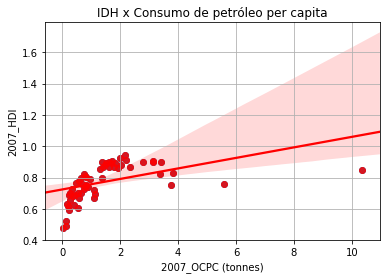

In [6]:
#Plotando primeiro scatter, IDH x Consumo de petróleo per capita  

plt.scatter(data['2007_OCPC (tonnes)'], data['2007_HDI'])
plt.ylabel('HDI')
plt.xlabel('Oil Consumption per capita (tonnes)')
plt.title('IDH x Consumo de petróleo per capita')
sns.regplot(data['2007_OCPC (tonnes)'], data['2007_HDI'], color = 'r') 
plt.grid(True)

Ao analisar o gráfico de dispersão do IDH pelo Consumo de Petróleo per capita, verifica-se que há uma baixa correlação entre as duas variáveis (0.5, aproximadamente). 
A maioria dos países com IDH superior a 0.8 apresentam maior consumo de petróleo per capita em relação aos países com índices inferiores. Percebe-se também que os poucos países da amostra com baixo IDH (inferior a 0.6) apresentam consumo de petróleo per capita muito menor que uma tonelada, valor inferior à média (1.5 toneladas) e equivalente à mediana da amostra.
Já os países com IDH entre 0.6 e 0.8 apresentam um consumo per capita muito próximo à mediana (1 tonelada), com excessão de dois outliers. 
Mesmo não havendo causalidade, é seguro afirmar que os países com baixo IDH consomem menos petróleo per capita que os com IDH médio (entre 0.6 e 0.8), os quais apresentam um consumo próximo à mediana (1 tonelada); e que a maioria dos países com alto IDH (superior a 0.8) apresentam consumo de petróleo per capita superior aos com IDH médio.

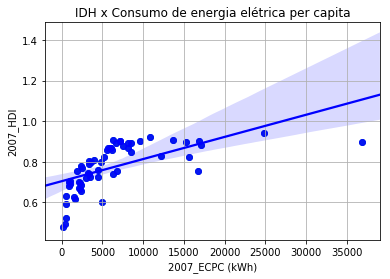

In [7]:
#Plotando o segundo scatter, IDH x Consumo de energia elétrica per capita

plt.scatter(data['2007_ECPC (kWh)'], data['2007_HDI'])
plt.ylabel('HDI')
plt.xlabel('Electricity Consumption per capita (kWh)')
plt.title('IDH x Consumo de energia elétrica per capita')
sns.regplot(data['2007_ECPC (kWh)'], data['2007_HDI'], color = 'b')
plt.grid(True)

Analisando o gráfico de dispersão do IDH pelo Consumo de Energia Elétrica per capita verifica-se um comportamento dos pontos gerados muito semelhante ao observado no scatter do IDH pelo Consumo de Petróleo per capita, porém com uma correlação ligeiramente maior de aproximadamente 0.6. Verifica-se neste caso que, assim como no anterior, os países com baixo IDH apresentam um consumo de energia elétrica per capita muito inferior à média (6357 kWh), porém aqui muito inferior também à mediana (4673 kWh). Já a maioria dos países com IDH médio apresentam consumo per capita menor que a média, porém mais próximo à mediana. Já os com alto IDH possuem consumo per capita acima da média e mais de quatro outliers com valores extremamente altos. Observa-se portanto um comportamento muito semelhante ao scatter do IDH pelo Consumo de Petróleo per capita, porém aqui os países com baixo IDH apresentam consumo per capita muito mais distante em relação à média e à mediana, assim como os com alto IDH.

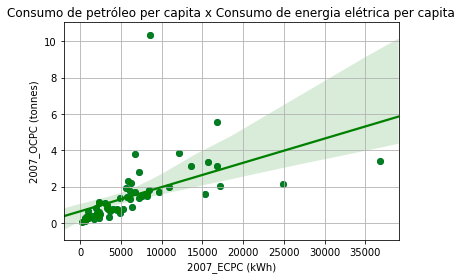

In [8]:
#Plotando terceiro scatter, Consumo de petróleo per capita x Consumo de energia elétrica per capita

plt.scatter(data['2007_ECPC (kWh)'], data['2007_OCPC (tonnes)'])
plt.ylabel('Oil Consumption per capita (tonnes)')
plt.xlabel('Electricity Consumption per capita (kWh)')
plt.title('Consumo de petróleo per capita x Consumo de energia elétrica per capita')
sns.regplot(data['2007_ECPC (kWh)'], data['2007_OCPC (tonnes)'], color = 'g')
plt.grid(True)

Comparando o Consumo de Energia Elétrica com o Consumo de Petróleo (ambos per capita) em um scatter, verifica-se uma correlação de aproximadamente 0.5. Por tratarem de variáveis energéticas, e pelo fato de todo país utilizar alguma das duas como forma de energia, acabam reproduzindo comportamentos semelhantes nos gráficos ao serem comparados com o IDH. Entretanto, não possuem relação direta entre si, tendo em vista que a energia elétrica utilizada pelos cidadãos abrange diversas funções (iluminação, uso de eletrodomésticos, etc...), enquanto o uso do petróleo está diretamente ligado à compra e uso de combustíveis. Logo, não necessariamente um país com alto consumo de eletricidade per capita apresentará alto consumo de petróleo per capita, e vice versa. Porém, esta correspondência é possível e ocorre em muitos países, como por exemplo os Estados Unidos, e pode ser identificada em muitos pontos do scatter.

Text(0.5,1,'Boxplot IDH 2007')

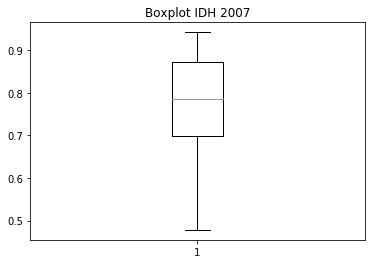

In [9]:
plt.boxplot(data['2007_HDI'])
plt.title('Boxplot IDH 2007')

Text(0.5,1,'Boxplot Consumo de Energia Elétrica per capita em 2007 (kWh)')

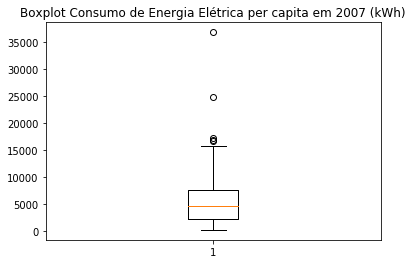

In [10]:
plt.boxplot(data['2007_ECPC (kWh)'])
plt.title('Boxplot Consumo de Energia Elétrica per capita em 2007 (kWh)')

Text(0.5,1,'Boxplot Consumo de Petróleo per capita em 2007 (toneladas)')

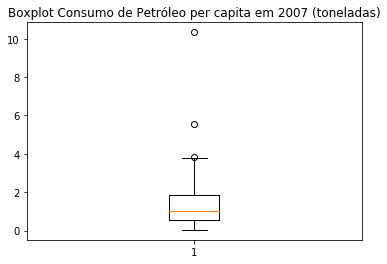

In [11]:
plt.boxplot(data['2007_OCPC (tonnes)'])
plt.title('Boxplot Consumo de Petróleo per capita em 2007 (toneladas)')

Text(0.5,1,'Histograma IDH')

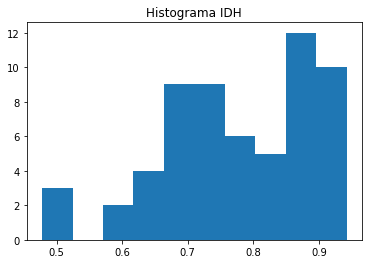

In [13]:
#Histograma IDH

plt.hist(data['2007_HDI'])
plt.title('Histograma IDH')

Um último fator a ser considerado para a elaboração da conclusão é a uniformidade da amostra. Como pode-se observar pelo histograma e pelo boxplot, a maioria dos 60 países utilizados no dataframe possuem um IDH entre 0.7 e 0.9, tornando a média próxima a 0.8, o que é considerado um valor alto para o IDH. Devido à falta de países com baixo IDH na amostra, não é seguro tomar uma conclusão imediata, mesmo que a análise indique que os países com baixo IDH consomem menos eletricidade e petróleo per capita em relação aos outros. Entretanto, a amostra apresenta uma quantidade semelhante de países com IDH alto e médio, o que fornece maior segurança na formulação de uma conclusão capaz de responder à pergunta que estimulou esta análise.

# Conclusão

Devido à baixa correlação entre o IDH e as variáveis utilizadas, não pode-se afirmar que elas influenciam diretamente o IDH dos países. Entretanto, a partir dos gráficos e resultados obtidos com a análise é possível concluir com certeza que os países com maior consumo de energia elétrica e petróleo per capita de toda a amostra possuem alto IDH ou médio próximo a 0.8. De maneira análoga, verifica-se que os países com baixo IDH apresentam consumos per capita muito inferiores às médias da amostra. Porém, como dito antes, a falta de países com IDH baixo na amostra não permite a formulação de uma conclusão exata, apesar de tudo indicar que, nos 'extremos' (IDH alto ou baixo), o IDH apresenta maior correlação com os níveis de consumo de energia elétrica e petróleo per capita, enquanto os países com IDH médio apresentam baixa correlação. 

A ideia de que países com maiores IDHs apresentam maior consumo de eletricidade e petróleo per capita em relação aos com menores índices é plausível na realidade, tendo em vista que um dos fatores componentes deste Índice é o PIB per capita. Em países onde este fator é elevado, é concedida à população como um todo melhores condições de adquirir bens de consumo, como por exemplo veículos motorizados, o que consequentemente aumentaria o consumo de petróleo per capita. O mesmo aplica-se à energia elétrica, a qual seria mais utilizada com o aumento do consumo de eletrodomésticos, por exemplo. Entretanto, estes são fenômenos que podem ou não ocorrer, o que é refletido na baixa correlação entre o IDH e as variáveis.

Por fim, counclui-se que há uma relação, ainda que fosca, entre o IDH e as variáveis utilizadas. Países com alto IDH apresentam altos consumos de energia elétrica e petróleo per capita em relação aos com menores índices, enquanto os com baixo IDH possuem consumos muito inferiores em relação aos com maiores. Porém, isto poderia ser melhor verificado em trabalhos futuros, utilizando amostras de diferentes anos as quais possuam mais países com IDHs baixos.

